In [32]:
import cv2
import numpy as np
from scipy.signal import convolve2d
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt

In [41]:
def load_image(path, mode=cv2.IMREAD_GRAYSCALE):
    '''
    :param path: image path
    :param mode: load mode, cv2.IMREAD_GRAYSCALE, cv2.IMREAD_COLOR
    :return: loaded img
    '''
    img = cv2.imread(path,mode)
    return img

# TODO: have bugs here
def show_image(img, mode='gray'):
    '''
        default mode is grayscale  
    '''
    plt.imshow(img, cmap='gray')
    
def save_image(img,name):
    cv2.imwrite(name,img)

In [34]:
def generate_gaussian_kernel(sigma,width,height):
    '''
    width and height are usually odd number
    :param sigma: sigma of gaussian kernel
    :param width: width of kernel
    :param height: height of kernel
    :return: np.ndarray, the generated kernel 
    '''
    x, y = width/2, height/2
    X = np.arange(-x, x+1, 1.0)**2
    Y = np.arange(-y, y+1, 1.0)**2

    X = np.exp(-X/(2 * sigma**2))
    Y = np.exp(-Y/(2 * sigma**2)) / (2 * sigma**2 * np.pi)
    output = np.outer(X, Y)
    
    normalize = np.sum(Y) * np.sum(X)
    return np.fliplr(np.flipud(output/ normalize))

In [35]:
def filter_image(img, sigma):
    return gaussian_filter(img,sigma=sigma)

In [43]:
def generated_hybrid_image(image1, image2):
    if image1.dtype == np.int8:
        image1 = image1.astype(np.float32)/255.0
        image2 = image2.astype(np.float32)/255.0
    
    sigma=0.5
    high_image = image1 - filter_image(image1, sigma)
    low_image = filter_image(image2, sigma)
    
    # ratio = 0.5
    # high_image *= 2 * (1-ratio)
    # low_image *= 2 * ratio
    
    hybrid_img = (img1 + img2)
    return (hybrid_img*255).clip(0, 255).astype(np.int8)

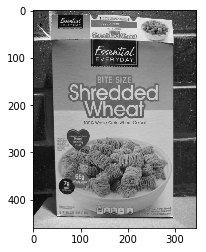

In [50]:
if __name__ == '__main__':
    img1 = load_image("data\\part1\\c1.jpg")
    img2 = load_image("data\\part1\\c2.jpg")
    show_image(img1)
    show_image(img2)
    hybrid = generated_hybrid_image(img1, img2)
    show_image(hybrid)
    save_image(hybrid, "hybrid.jpg")